# Mall customers exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from env import host, user, password

In [2]:
# Creating a string that connects me to MySQLWorkbench

def get_connection(db, user=user, host=host, password=password):
    '''
    get_connection uses login info from env.py file to access Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
# Getting the data from the Codeup database

def get_mall_customers_data():
    '''
    zillow_data() gets the zillow (only properties_2017 table) data from Codeup db, then writes it to a csv file,
    and returns the DF.
    '''
    # Creating a SQL query
    sql_query = '''
                SELECT * FROM customers;
                '''
    
    # Reading in the DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    return df

In [4]:
# Assigning the dataframe to a variable

customers = get_mall_customers_data()

In [5]:
# Displaying a portion of the dataframe to have a first look at it

customers.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Displaying the number of rows and columns

customers.shape

(200, 5)

In [8]:
# Getting some general information about the data

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Listing the columns

customers.columns.tolist()

['customer_id', 'gender', 'age', 'annual_income', 'spending_score']

In [9]:
# First statistical look at the data through the describe function

customers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [13]:
# Confirming there are no nulls

def multi_frequency(ds,vars):
    '''multi_frequency takes a dataframe in *arg and a *kwarg in the form of a list of columns
    and return a dataframe with the count and the frequency of the data
    '''
    frequency=ds[vars].isnull().sum()
    percentage=ds[vars].isnull().sum()*100/(len(ds))
    df=pd.concat([frequency,percentage], axis=1, keys=['num_rows_missing', 'pct_rows_missing'])
    return df
multi_frequency(customers, ['customer_id',
        'gender',
        'age',
        'annual_income',
        'spending_score'])

,num_rows_missing,pct_rows_missing
customer_id,0,0.0
gender,0,0.0
age,0,0.0
annual_income,0,0.0
spending_score,0,0.0


customer_id


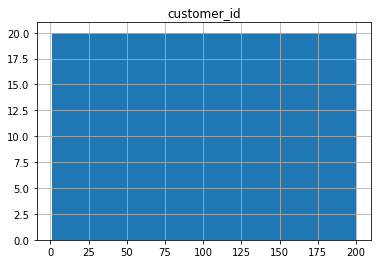

gender


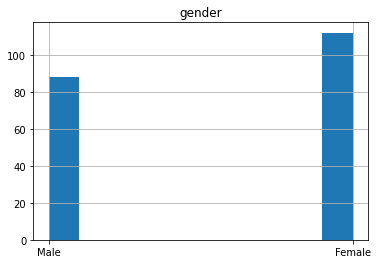

age


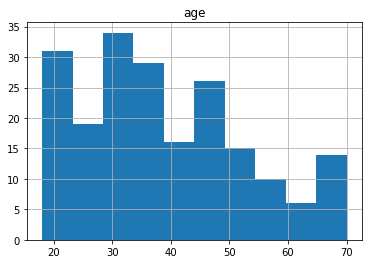

annual_income


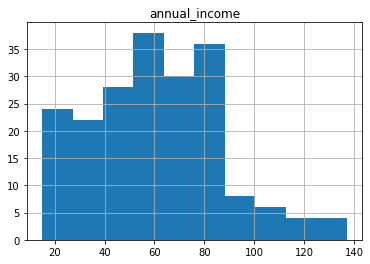

spending_score


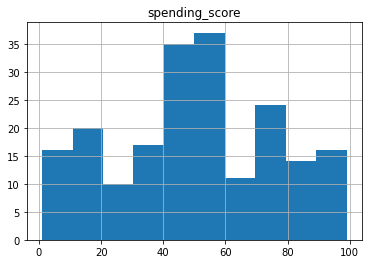

In [14]:
# Plotting a histogram of each column

for column in customers.columns:
    print(column)
    plt.title(column)
    customers[column].hist()
    plt.grid(True)
    plt.show()

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'annual_income'}>,
        <AxesSubplot:title={'center':'spending_score'}>]], dtype=object)

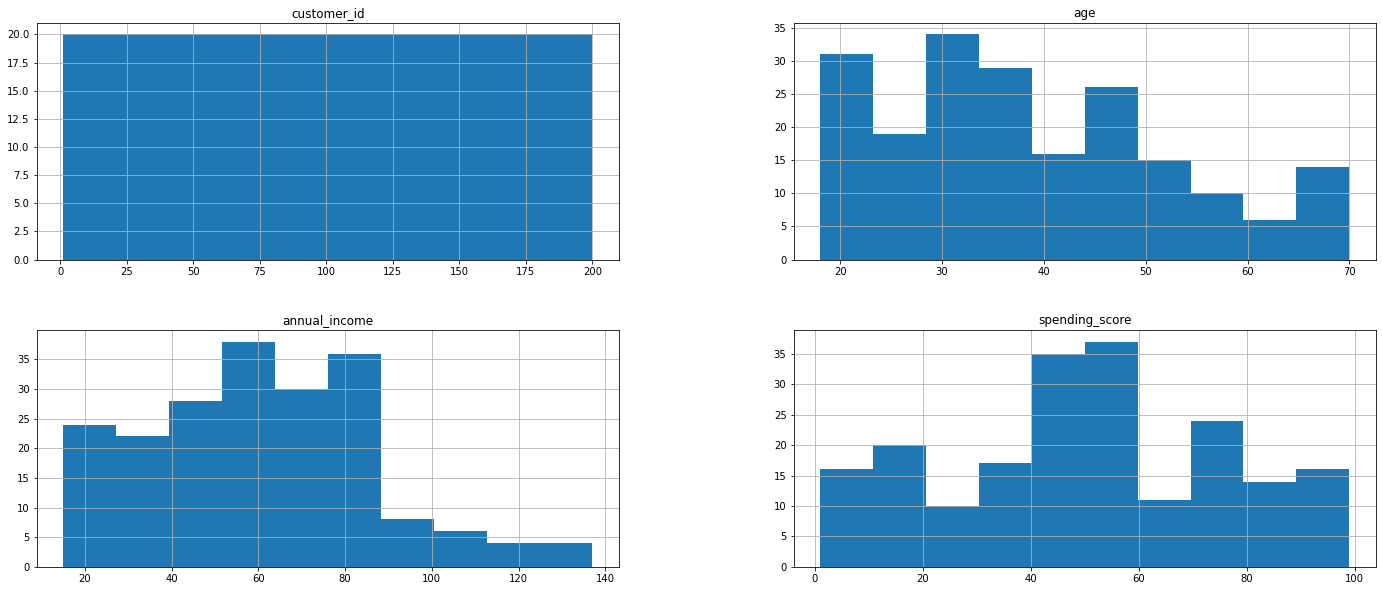

In [15]:
# Comparing the previous code to this one to see the difference of results
customers.hist(figsize=(24, 10))


In [ ]:
def get_ouliers(S, k):
    '''
    get_upper_outliers takes in a series and a cutoff value, k,
    customarily set at 1.5 and returns the upper outliers for the
    series.

    The values returned will be either 0 (not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    lower_bound = q1 - k * iqr
    for x in S:
        x = max([x - lower_bound, 0])
        or x = max([x - upper_bound, 0])
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [ ]:
return 

In [26]:
def get_upper_outliers(S, k):
    '''
    get_upper_outliers takes in a series and a cutoff value, k,
    customarily set at 1.5 and returns the upper outliers for the
    series.

    The values returned will be either 0 (not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [25]:
def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(customers, k=1.5)

customers

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers,customer_id_outliers_outliers,age_outliers_outliers,annual_income_outliers_outliers,spending_score_outliers_outliers
0,1,Male,19,15,39,0,0,0.00,0,0.0,0.0,0.00,0.0
1,2,Male,21,15,81,0,0,0.00,0,0.0,0.0,0.00,0.0
2,3,Female,20,16,6,0,0,0.00,0,0.0,0.0,0.00,0.0
3,4,Female,23,16,77,0,0,0.00,0,0.0,0.0,0.00,0.0
4,5,Female,31,17,40,0,0,0.00,0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0,0.00,0,0.0,0.0,0.00,0.0
196,197,Female,45,126,28,0,0,0.00,0,0.0,0.0,0.00,0.0
197,198,Male,32,126,74,0,0,0.00,0,0.0,0.0,0.00,0.0
198,199,Male,32,137,18,0,0,4.25,0,0.0,0.0,4.25,0.0


In [ ]:
def examine_and_prepare()